In [96]:
# Microsoft Turkey Summer Internship Program Projecy by Defne Meric Erdogan

In [97]:
# Importing libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import optuna
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [98]:
# Importing the dataset
stocks = pd.read_csv('MSFT.csv')

# Data Analysis

In [99]:
print(stocks.head())

         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982    47894400


In [100]:
print(stocks.describe())

              Open         High          Low        Close    Adj Close  \
count  9083.000000  9083.000000  9083.000000  9083.000000  9083.000000   
mean     41.324936    41.760887    40.878488    41.335628    36.256120   
std      59.696905    60.272218    59.081728    59.714567    59.981436   
min       0.088542     0.092014     0.088542     0.090278     0.057046   
25%       4.050781     4.102051     4.027344     4.075195     2.575089   
50%      26.820000    27.100000    26.520000    26.840000    18.948530   
75%      40.034999    40.443751    39.500000    39.937500    29.244812   
max     344.619995   349.670013   342.200012   343.109985   342.402008   

             Volume  
count  9.083000e+03  
mean   5.875055e+07  
std    3.845200e+07  
min    2.304000e+06  
25%    3.461230e+07  
50%    5.203200e+07  
75%    7.265400e+07  
max    1.031789e+09  


In [101]:
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB
None


In [102]:
print(stocks.isnull().sum()) # to check if there are any missing values we need to handle
# There are no missing values in the dataset

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Visualizing

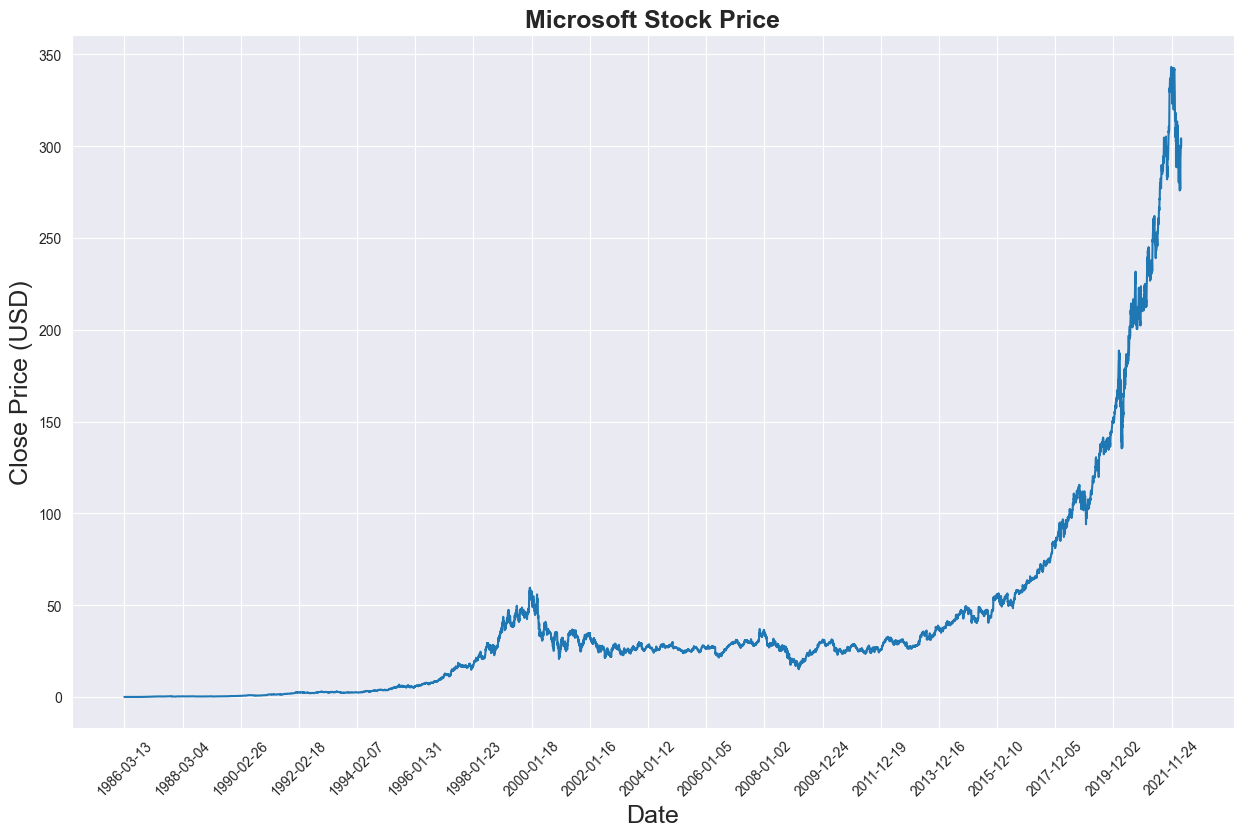

In [103]:
# We see the Close Price of the stock change with the time 
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(stocks[['Close']])
plt.xticks(range(0,stocks.shape[0],500),stocks['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

## Handling Outliers

In [104]:
# Removes values that fall outside 1.5×IQR range:

Q1 = stocks['Close'].quantile(0.25)
Q3 = stocks['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

stocks = stocks[(stocks['Close'] >= lower_bound) & (stocks['Close'] <= upper_bound)]


In [105]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8076 entries, 0 to 8101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8076 non-null   object 
 1   Open       8076 non-null   float64
 2   High       8076 non-null   float64
 3   Low        8076 non-null   float64
 4   Close      8076 non-null   float64
 5   Adj Close  8076 non-null   float64
 6   Volume     8076 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 504.8+ KB


## Normalizing Data

In [106]:
price = stocks[['Close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8076 entries, 0 to 8101
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   8076 non-null   float64
dtypes: float64(1)
memory usage: 126.2 KB


In [107]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/var/folders/cs/qhd03p2d7jbc52xf4cfs6md40000gn/T/ipykernel_10718/2141647733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))


In [108]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


# Preparation for Model

In [109]:
# Using sliding window method 
# This creates training sampels by taking a sequence of past values and using them to predict the next values.
def split_data(stock, lookback):
    data_raw = stock.to_numpy() 
    data = []
    
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

lookback = 30
x_train, y_train, x_test, y_test = split_data(price, lookback)

In [110]:
# Transofrming the data into tensors 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
x_train = torch.from_numpy(x_train).type(torch.Tensor).to(device)
x_test = torch.from_numpy(x_test).type(torch.Tensor).to(device)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor).to(device)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor).to(device)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor).to(device)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor).to(device)


Using device: cpu


# LSTM MODEL

In [111]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.linear(out[:, -1, :]) 
        return out

## Finding Best Parameters with HyperParameter Optimization

In [112]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


In [117]:
def train_model(model, optimizer, criterion, train_loader, val_loader, epochs=5, patience=10):
    early_stopping = EarlyStopping(patience=patience)
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        for x_batch, y_batch in train_loader:
            output = model(x_batch)
            loss = criterion(output, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                output = model(x_batch)
                loss = criterion(output, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        if early_stopping(val_loss):
            print(f"Early stopping at epoch {epoch}")
            break
    return val_loss


def objective(trial):
    # Suggest hyperparameters
    hidden_dim = trial.suggest_int("hidden_dim", 32, 256)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    learning_rate = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    # Model
    model = LSTM(input_dim=1, hidden_dim=hidden_dim, num_layers=num_layers, output_dim=1).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Data loaders
    dataset = TensorDataset(x_train, y_train_lstm)
    val_dataset = TensorDataset(x_test, y_test_lstm)

    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    val_loss = train_model(model, optimizer, criterion, train_loader, val_loader, epochs=5, patience=5)
    return val_loss


In [118]:
study = optuna.create_study(direction="minimize")
#study.optimize(objective, n_trials=1000, show_progress_bar=True, n_jobs=3)
study.optimize(objective, n_trials=5)

print("Best trial:")
trial = study.best_trial
for key, value in trial.params.items():
    print(f"{key}: {value}")


[I 2025-07-17 14:39:17,365] A new study created in memory with name: no-name-564ce785-7d62-4399-b1d7-936e2fd3d29a
[I 2025-07-17 14:39:44,588] Trial 0 finished with value: 0.003420794911037844 and parameters: {'hidden_dim': 201, 'num_layers': 3, 'lr': 0.000966682061739338, 'batch_size': 128}. Best is trial 0 with value: 0.003420794911037844.
[I 2025-07-17 14:40:12,436] Trial 1 finished with value: 0.0008464322132104094 and parameters: {'hidden_dim': 206, 'num_layers': 2, 'lr': 0.004007809372758883, 'batch_size': 32}. Best is trial 1 with value: 0.0008464322132104094.
[I 2025-07-17 14:41:05,423] Trial 2 finished with value: 0.005124234403232478 and parameters: {'hidden_dim': 255, 'num_layers': 3, 'lr': 0.0001231536633826369, 'batch_size': 32}. Best is trial 1 with value: 0.0008464322132104094.
[I 2025-07-17 14:41:33,228] Trial 3 finished with value: 0.07384948182600336 and parameters: {'hidden_dim': 206, 'num_layers': 3, 'lr': 0.007965618818888055, 'batch_size': 128}. Best is trial 1 wit

Best trial:
hidden_dim: 206
num_layers: 2
lr: 0.004007809372758883
batch_size: 32


In [119]:
best_params = study.best_trial.params
print(best_params)

{'hidden_dim': 206, 'num_layers': 2, 'lr': 0.004007809372758883, 'batch_size': 32}


In [ ]:
# Set the parameters for the LSTM model with the best parameters
input_dim = 1
hidden_dim = study.best_params['hidden_dim']
num_layers = study.best_params['num_layers']
output_dim = 1
num_epochs = 120
learning_rate = study.best_params['lr']

In [ ]:
# Initialize the model, loss function, and optimizer
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
loss_fn = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.learning_rate)

## Train the Model

In [ ]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    model.train()
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.4402081072330475
Epoch  1 MSE:  0.2272740602493286
Epoch  2 MSE:  0.058255065232515335
Epoch  3 MSE:  0.8628641963005066
Epoch  4 MSE:  0.05652368441224098
Epoch  5 MSE:  0.13931423425674438
Epoch  6 MSE:  0.18070447444915771
Epoch  7 MSE:  0.19397763907909393
Epoch  8 MSE:  0.1929018497467041
Epoch  9 MSE:  0.1835734248161316
Epoch  10 MSE:  0.16863402724266052
Epoch  11 MSE:  0.14923761785030365
Epoch  12 MSE:  0.12615586817264557
Epoch  13 MSE:  0.10097774863243103
Epoch  14 MSE:  0.07837988436222076
Epoch  15 MSE:  0.06999202817678452
Epoch  16 MSE:  0.0877063125371933
Epoch  17 MSE:  0.0945650115609169
Epoch  18 MSE:  0.08248079568147659
Epoch  19 MSE:  0.0698389932513237
Epoch  20 MSE:  0.0640752762556076
Epoch  21 MSE:  0.06335577368736267
Epoch  22 MSE:  0.06431635469198227
Epoch  23 MSE:  0.06464239954948425
Epoch  24 MSE:  0.06301141530275345
Epoch  25 MSE:  0.05862537771463394
Epoch  26 MSE:  0.05088404193520546
Epoch  27 MSE:  0.03956900164484978
Epoch  28 

In [ ]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

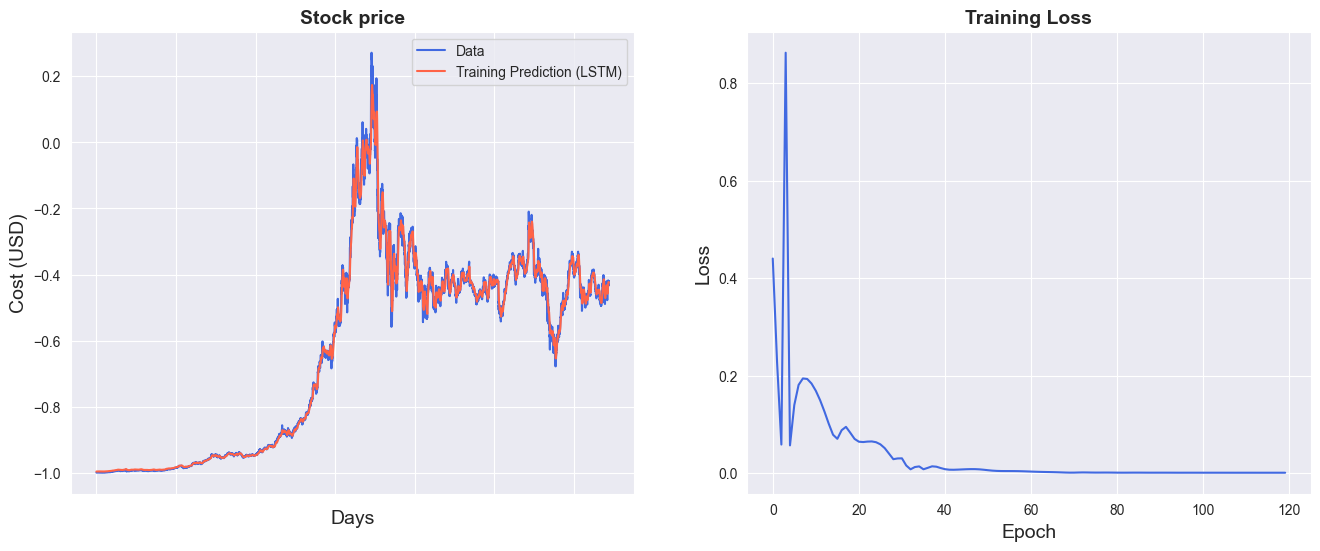

In [ ]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

# The training prediction for the LSTM model is really good.

## Evaluate the Model

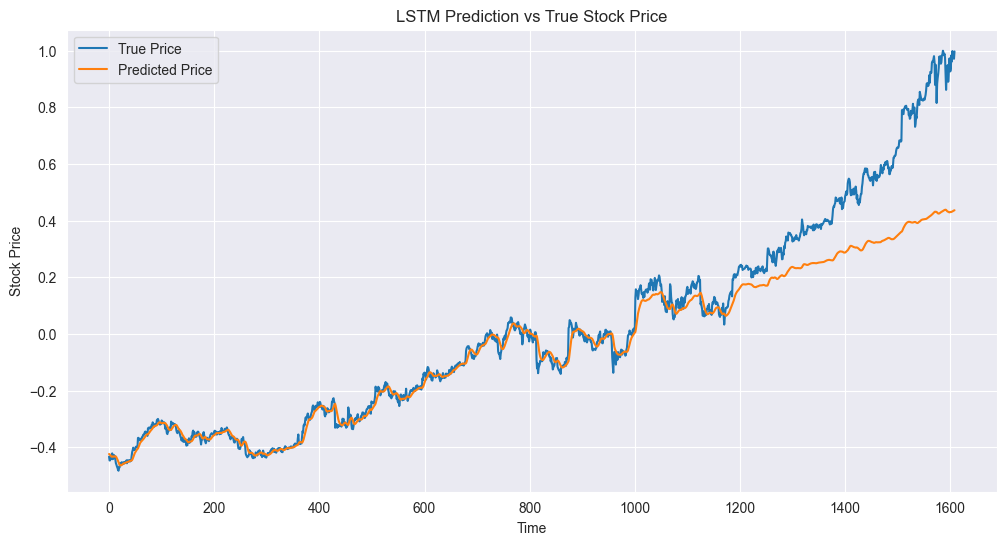

In [ ]:
model.eval()
with torch.no_grad():
    y_test_pred = model(x_test)

# Convert to NumPy
y_test_pred_unscaled = scaler.inverse_transform(y_test_pred)
y_test_true_unscaled = scaler.inverse_transform(y_test_lstm)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_true_unscaled, label='True Price')
plt.plot(y_test_pred_unscaled, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('LSTM Prediction vs True Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# GRU MODEL

## Finding Best Parameters with HyperParameter Optimization

# Comparing GRU vs LSTM and Evaluation